In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import t

## Zusammenführen der drei Datensätze in einem Dataframe
#Pfade zuteilen
pfad_1 = 'kiwo.csv'
pfad_2 = 'umsatzdaten_gekuerzt.csv'
pfad_3 = 'wetter.csv'
pfad_4 = 'fuf.csv'

# Einlesen der CSVs
daten_1 = pd.read_csv(pfad_1, usecols=['Datum', 'KielerWoche'])
daten_2 = pd.read_csv(pfad_2, usecols=['Datum', 'Warengruppe', 'Umsatz'])
daten_3 = pd.read_csv(pfad_3, usecols=['Datum', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode'])
daten_4 = pd.read_csv(pfad_4, usecols=['Datum', 'FerienSH', 'Feiertag'])

#Zusammenführen der df
# Datensätze zusammenführen mit Outer Join
merged_df = pd.merge(daten_1, daten_2, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_3, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_4, how='outer', on= 'Datum')

merged_df.shape
print(merged_df)


merged_df.shape
print(merged_df)

# Print the first 5 rows of the merged DataFrame
print(merged_df.head())



print(merged_df.info())

print(merged_df.describe())

print(merged_df['KielerWoche'].value_counts())
print(merged_df['Warengruppe'].value_counts())
print(merged_df['Windgeschwindigkeit'].value_counts())
print(merged_df['FerienSH'].value_counts())
print(merged_df['Feiertag'].value_counts())
print(merged_df['Wettercode'].value_counts())
print(merged_df['Feiertag'].value_counts())

#Histogramme 

# Kieler Woche 
plt.hist(merged_df['KielerWoche'])

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Kieler Woche ')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# Warengruppe
plt.hist(merged_df['Warengruppe'])

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Warengruppe ')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

print(merged_df['Umsatz'].kurtosis())
print(merged_df['Umsatz'].skew())

print(merged_df['Bewoelkung'].kurtosis())
print(merged_df['Bewoelkung'].skew())

print(merged_df['Temperatur'].kurtosis())
print(merged_df['Temperatur'].skew())

print(merged_df['Windgeschwindigkeit'].kurtosis())
print(merged_df['Windgeschwindigkeit'].skew())

#Abbildungen 

merged_df['Warengruppe'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Verteilung der Warengruppen')
plt.ylabel('')
plt.show()

#Windgeschwindigkeit 
plt.hist(merged_df['Windgeschwindigkeit'])

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Windgeschwindigekeit ')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# linksschief verteilt --> eventuell mit log-Funktion transformieren

# Wettercode
plt.hist(merged_df['Wettercode'])

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Wettercode ')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# Daten sind nicht normalverteilt --> Daten in Klassen überführen und dann noch mal Histogramm erstellen 


# Temperatur 
plt.hist(merged_df['Temperatur'])

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Temperatur ')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# Daten sind bimodal verteilt --> am besten Daten mit arcsin-Transformation transformieren



# Scatterplot 
plt.figure(figsize=(8, 6))

# Scatterplot der Daten
plt.scatter(merged_df['Temperatur'], merged_df['Umsatz'], label='Daten')

# Scatterplot 
plt.figure(figsize=(8, 6))

# Scatterplot der Daten
plt.scatter(merged_df['Windgeschwindigkeit'], merged_df['Umsatz'], label='Daten')

# Scatterplot 
plt.figure(figsize=(8, 6))
# Scatterplot der Daten
plt.scatter(merged_df['Bewoelkung'], merged_df['Umsatz'], label='Daten')

# Scatterplot der Daten
plt.scatter(merged_df['Windgeschwindigkeit'], merged_df['Umsatz'], label='Daten')

# Scatterplot 
plt.figure(figsize=(8, 6))


import pandas as pd
import statsmodels.formula.api as smf


# Fit the linear model
mod = smf.ols('Umsatz ~ C(Warengruppe) + C(Windgeschwindigkeit)+C(FerienSH)', data=merged_df).fit()

# Print the summary
print(mod.summary())

            Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0      2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1      2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2      2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3      2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4      2012-01-05          NaN          NaN     NaN         6.0      5.3000   
...           ...          ...          ...     ...         ...         ...   
10432  2019-12-27          NaN          NaN     NaN         NaN         NaN   
10433  2019-12-28          NaN          NaN     NaN         NaN         NaN   
10434  2019-12-29          NaN          NaN     NaN         NaN         NaN   
10435  2019-12-30          NaN          NaN     NaN         NaN         NaN   
10436  2019-12-31          NaN          NaN     NaN         NaN         NaN   

       Windgeschwindigkeit  Wettercode  FerienSH  F

ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "3", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

      Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
12      NaT          NaN          NaN     NaN         2.0      4.8000   
13      NaT          NaN          NaN     NaN         3.0      2.8875   
14      NaT          NaN          NaN     NaN         1.0      2.2250   
15      NaT          NaN          NaN     NaN         8.0      3.0625   
16      NaT          NaN          NaN     NaN         6.0      4.4875   
...     ...          ...          ...     ...         ...         ...   
10432   NaT          NaN          NaN     NaN         NaN         NaN   
10433   NaT          NaN          NaN     NaN         NaN         NaN   
10434   NaT          NaN          NaN     NaN         NaN         NaN   
10435   NaT          NaN          NaN     NaN         NaN         NaN   
10436   NaT          NaN          NaN     NaN         NaN         NaN   

       Windgeschwindigkeit  Wettercode  FerienSH  Feiertag Wochentag  
12                    18.0         NaN       0.0    

/home/codespace/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6834: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/codespace/.local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6835: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

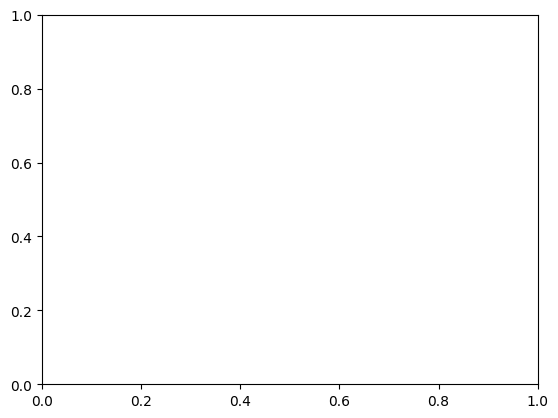

       Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0 2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1 2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2 2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3 2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4 2012-01-05          NaN          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode  FerienSH  Feiertag  Wochentag  
0                 14.0        58.0       1.0       1.0     Sunday  
1                 12.0         NaN       1.0       0.0     Monday  
2                 18.0        63.0       1.0       0.0    Tuesday  
3                 19.0        80.0       1.0       0.0  Wednesday  
4                 23.0        80.0       1.0       0.0   Thursday  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 11 columns):
 #   Column               Non-Null Cou

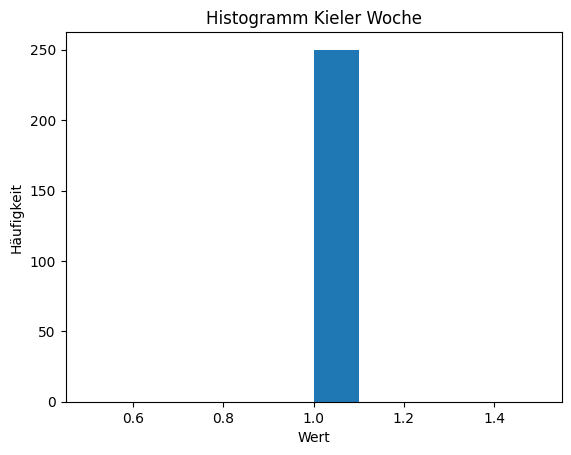

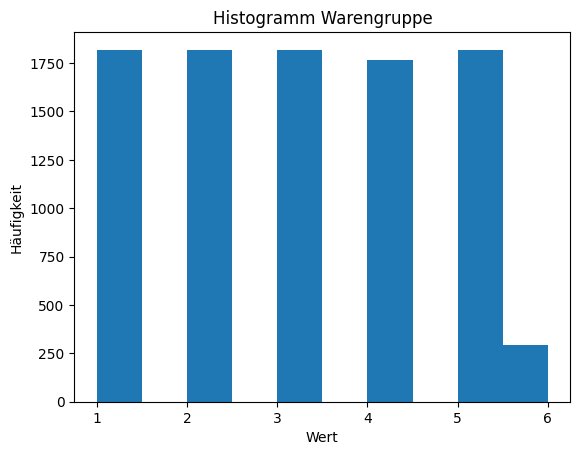

8.017525298144854
1.8320154611329023
-0.9841120951513203
-0.6516420652153972
-0.7540201252744199
0.0065604668843705005
1.3357365500012133
0.9098916484114926


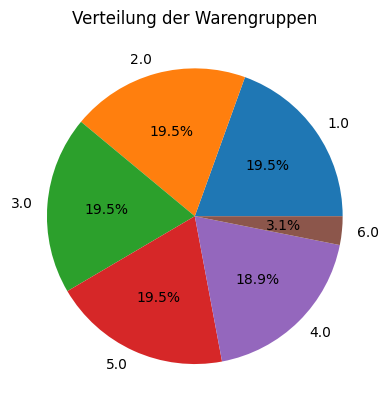

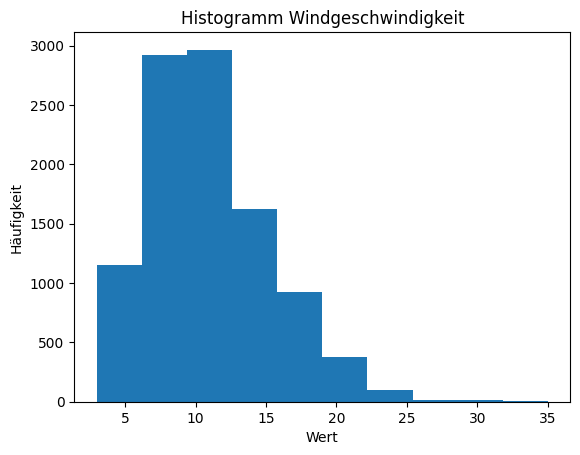

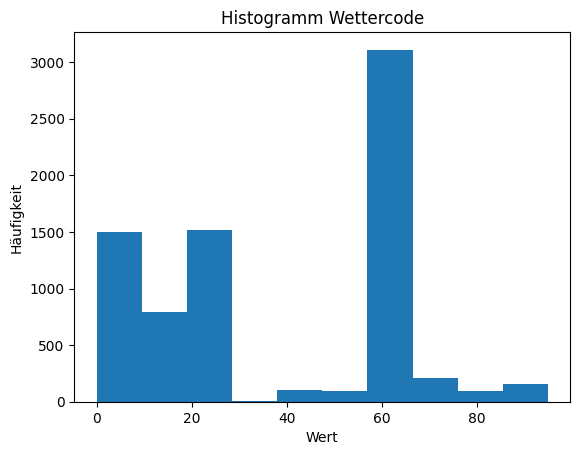

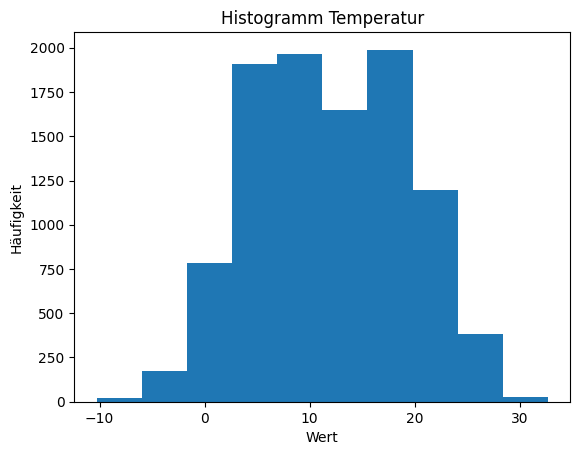

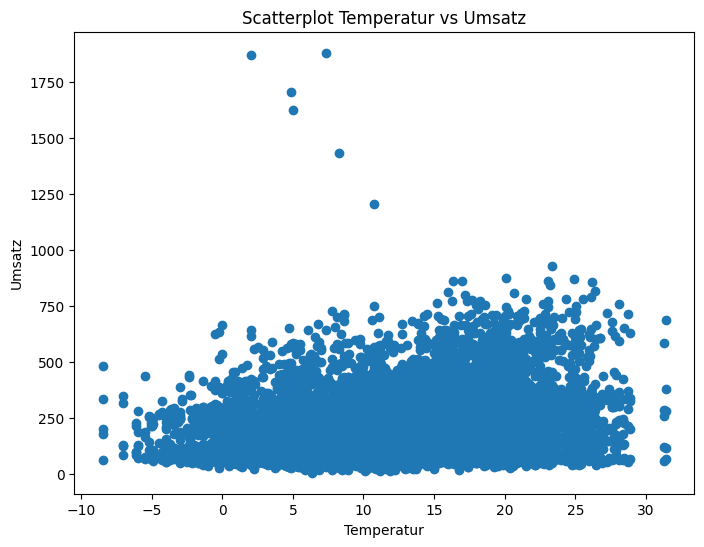

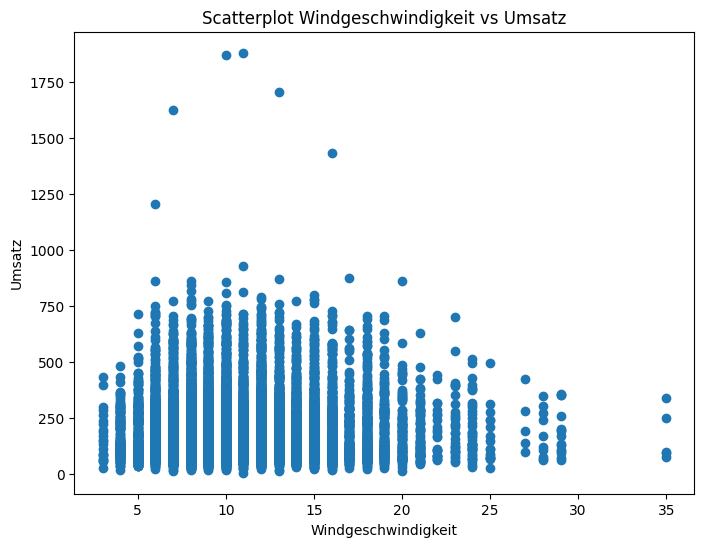

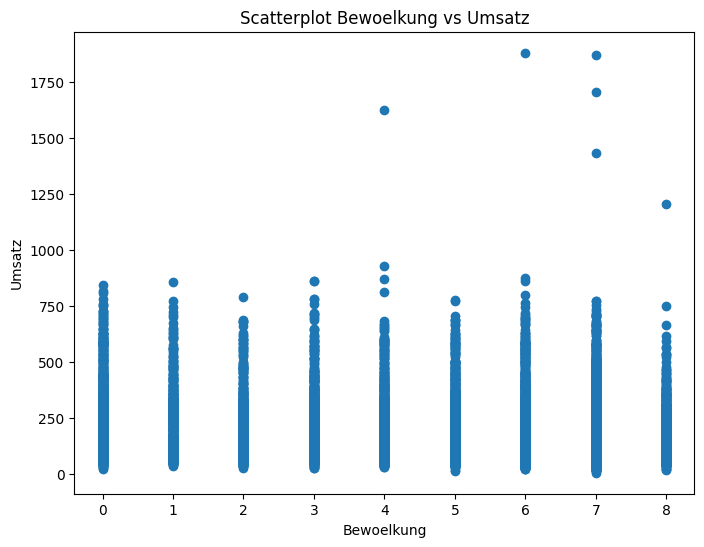

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     602.8
Date:                Fri, 24 May 2024   Prob (F-statistic):               0.00
Time:                        09:10:45   Log-Likelihood:                -54330.
No. Observations:                9318   AIC:                         1.087e+05
Df Residuals:                    9285   BIC:                         1.090e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Zusammenführen der drei Datensätze in einem Dataframe
# Pfade zuteilen
pfad_1 = 'kiwo.csv'
pfad_2 = 'umsatzdaten_gekuerzt.csv'
pfad_3 = 'wetter.csv'
pfad_4 = 'fuf.csv'

# Einlesen der CSVs
daten_1 = pd.read_csv(pfad_1, usecols=['Datum', 'KielerWoche'])
daten_2 = pd.read_csv(pfad_2, usecols=['Datum', 'Warengruppe', 'Umsatz'])
daten_3 = pd.read_csv(pfad_3, usecols=['Datum', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Wettercode'])
daten_4 = pd.read_csv(pfad_4, usecols=['Datum', 'FerienSH', 'Feiertag'])

# Zusammenführen der df
# Datensätze zusammenführen mit Outer Join
merged_df = pd.merge(daten_1, daten_2, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_3, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_4, how='outer', on='Datum')

# Konvertieren der 'Datum' Spalte in ein datetime-Objekt
merged_df['Datum'] = pd.to_datetime(merged_df['Datum'], format='%Y-%m-%d')

# Hinzufügen der Wochentag-Spalte
merged_df['Wochentag'] = merged_df['Datum'].dt.day_name()


print(merged_df.head())

print(merged_df.info())

print(merged_df.describe())

print(merged_df['KielerWoche'].value_counts())
print(merged_df['Warengruppe'].value_counts())
print(merged_df['Windgeschwindigkeit'].value_counts())
print(merged_df['FerienSH'].value_counts())
print(merged_df['Feiertag'].value_counts())
print(merged_df['Wettercode'].value_counts())

# Histogramme
# Kieler Woche 
plt.hist(merged_df['KielerWoche'].dropna())

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Kieler Woche')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# Warengruppe
plt.hist(merged_df['Warengruppe'].dropna())

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Warengruppe')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

print(merged_df['Umsatz'].kurtosis())
print(merged_df['Umsatz'].skew())

print(merged_df['Bewoelkung'].kurtosis())
print(merged_df['Bewoelkung'].skew())

print(merged_df['Temperatur'].kurtosis())
print(merged_df['Temperatur'].skew())

print(merged_df['Windgeschwindigkeit'].kurtosis())
print(merged_df['Windgeschwindigkeit'].skew())

# Abbildungen
merged_df['Warengruppe'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Verteilung der Warengruppen')
plt.ylabel('')
plt.show()

# Windgeschwindigkeit 
plt.hist(merged_df['Windgeschwindigkeit'].dropna())

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Windgeschwindigkeit')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# Wettercode
plt.hist(merged_df['Wettercode'].dropna())

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Wettercode')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# Temperatur 
plt.hist(merged_df['Temperatur'].dropna())

# Hinzufügen von Titeln und Labels
plt.title('Histogramm Temperatur')
plt.xlabel('Wert')
plt.ylabel('Häufigkeit')

# Anzeigen des Histogramms
plt.show()

# Scatterplots
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Temperatur'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Scatterplot Temperatur vs Umsatz')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Windgeschwindigkeit'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Umsatz')
plt.title('Scatterplot Windgeschwindigkeit vs Umsatz')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(merged_df['Bewoelkung'], merged_df['Umsatz'], label='Daten')
plt.xlabel('Bewoelkung')
plt.ylabel('Umsatz')
plt.title('Scatterplot Bewoelkung vs Umsatz')
plt.show()

# Lineares Modell
mod = smf.ols('Umsatz ~ C(Warengruppe) + C(Windgeschwindigkeit) + C(FerienSH)', data=merged_df).fit()

# Zusammenfassung des Modells
print(mod.summary())
